In [1]:
# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# first input model
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)

conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)

conv13 = Conv2D(16, kernel_size=4, activation='relu')(pool12)
pool13 = MaxPooling2D(pool_size=(2, 2))(conv13)


conv14 = Conv2D(16, kernel_size=4, activation='relu')(pool13)
pool14 = MaxPooling2D(pool_size=(2, 2))(conv14)
flat1 = Flatten()(pool14)

# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# third input model
visible3 = Input(shape=(32,32,3))
conv31 = Conv2D(32, kernel_size=4, activation='relu')(visible3)
pool31 = MaxPooling2D(pool_size=(2, 2))(conv31)

conv32 = Conv2D(16, kernel_size=4, activation='relu')(pool31)
pool32 = MaxPooling2D(pool_size=(2, 2))(conv32)

conv33 = Conv2D(16, kernel_size=4, activation='relu')(pool32)
pool33 = MaxPooling2D(pool_size=(2, 2))(conv33)
flat3 = Flatten()(pool33)


# fourth input model
visible4 = Input(shape=(32,32,3))
conv41 = Conv2D(32, kernel_size=4, activation='relu')(visible4)
pool41 = MaxPooling2D(pool_size=(2, 2))(conv41)
conv42 = Conv2D(16, kernel_size=4, activation='relu')(pool41)
pool42 = MaxPooling2D(pool_size=(2, 2))(conv42)
flat4 = Flatten()(pool42)

# merge input models
merge = concatenate([flat1, flat2, flat3, flat4])
# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
hidden4 = Dense(10, activation='relu')(hidden3)
output = Dense(1, activation='sigmoid')(hidden4)
model = Model(inputs=[visible1, visible2, visible3, visible4], outputs=output)

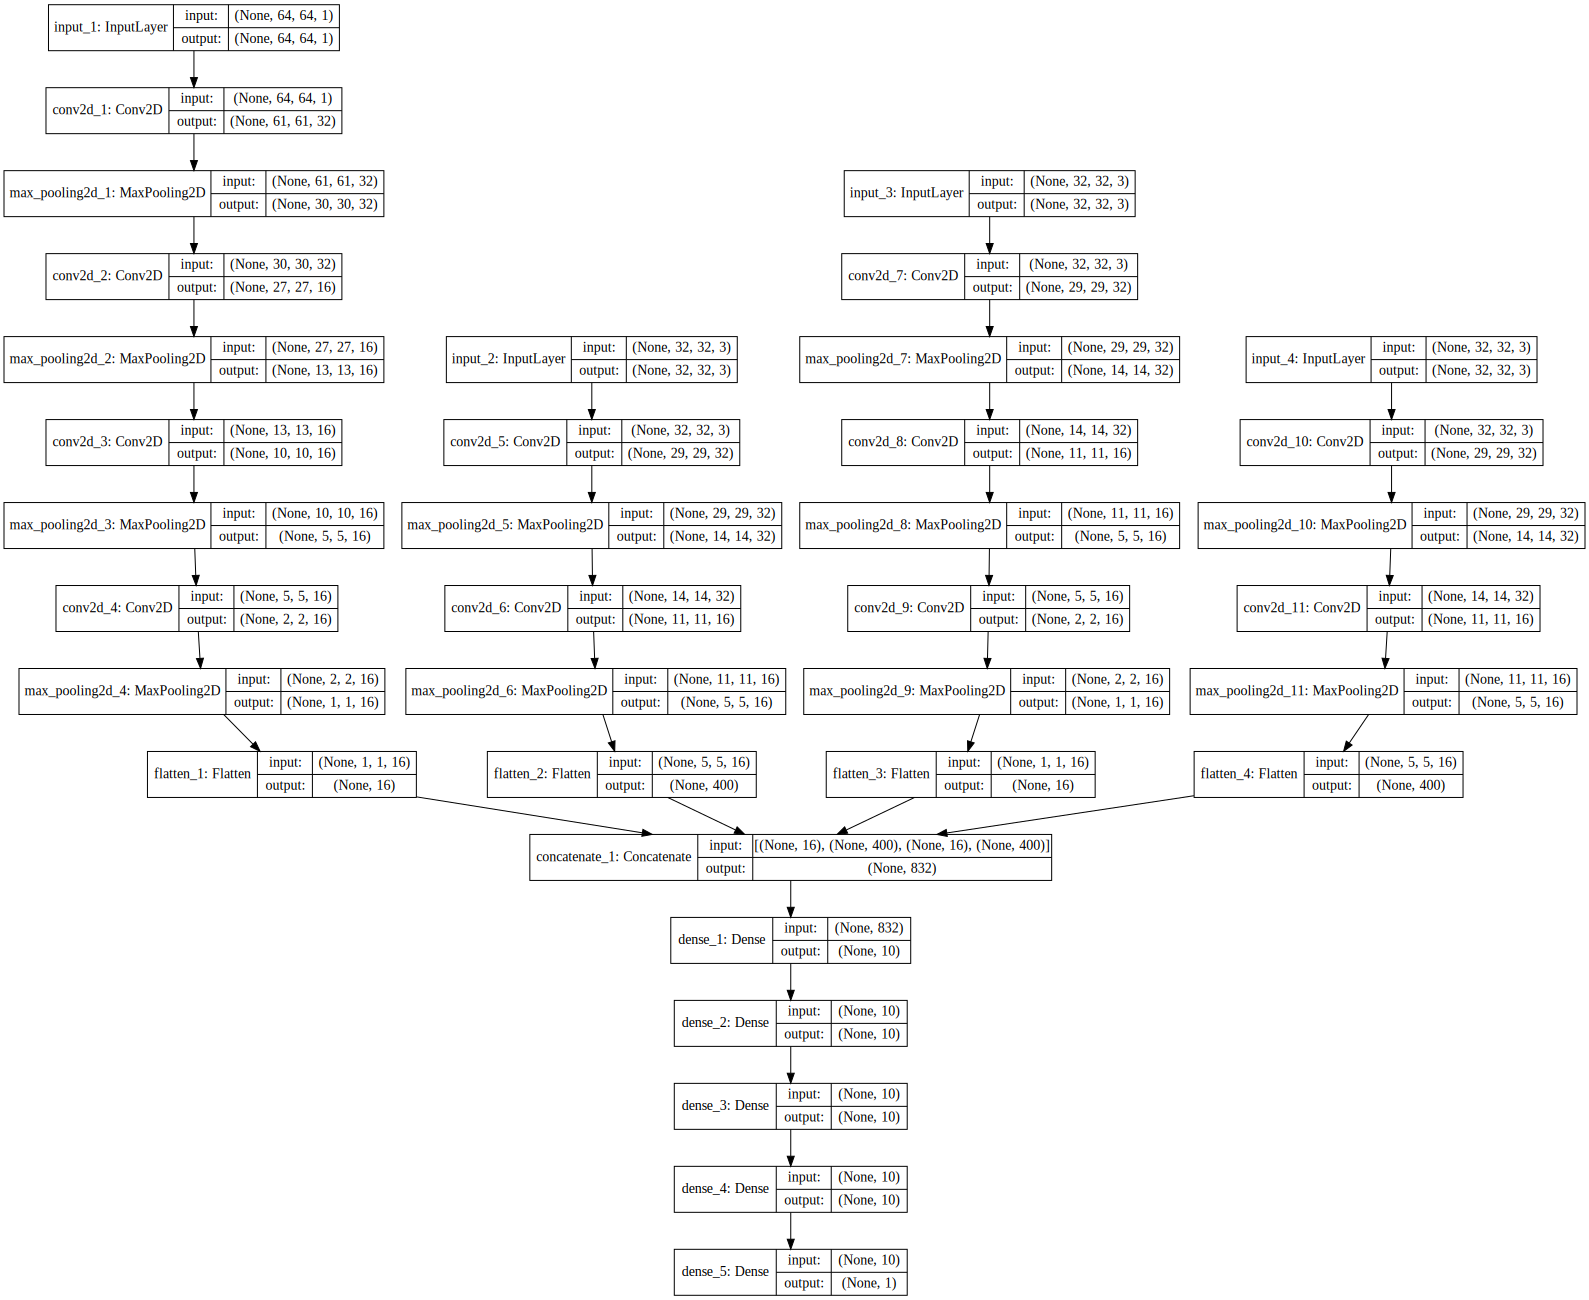

In [3]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
# summarize layers
#print(model.summary())
# plot graph
plot_model(model, to_file='multiple_inputs.png')